In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/online_retail (1).csv')

In [3]:

duplicate_rows = df[df.duplicated()]

print("Duplicate rows in the dataset:")
display(duplicate_rows.head())

print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")

Duplicate rows in the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2022-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2022-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2022-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2022-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2022-12-01 11:49:00,2.95,17920.0,United Kingdom



Number of duplicate rows: 5268


In [4]:
df.drop_duplicates(inplace=True)
print(df.shape)

(536641, 8)


In [5]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [7]:
df.shape

(536641, 8)

In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [9]:
df['Description'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1790542951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)


In [10]:
# Drop rows where the 'Description' column has missing values
df.dropna(subset=['CustomerID'], inplace=True)

# Verify that there are no more missing values in the 'Description' column
print(df.isnull().sum())

display(df.head())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C', na=False)]

In [12]:
# Remove rows with negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Display the first few rows to verify the change
display(df.shape)

(392692, 8)

In [13]:
# Group by Country and count the number of transactions
country_transaction_volume = df['Country'].value_counts()
print(country_transaction_volume)

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [14]:
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(top_selling_products.head(10))

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


# Task
Analyze and visualize purchase trends over time using the `InvoiceDate` column.

## Convert invoicedate to datetime

### Subtask:
Ensure the 'InvoiceDate' column is in datetime format for time-based analysis.


**Reasoning**:
Convert the 'InvoiceDate' column to datetime objects and verify the data type.



In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].dtype)

datetime64[ns]


## Extract time features

### Subtask:
Extract the month and year from the 'InvoiceDate' to analyze trends monthly or yearly.


**Reasoning**:
Extract the month and year from the 'InvoiceDate' column for monthly and yearly trend analysis.



In [16]:
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2022
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2022
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2022
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2022
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2022


## Group by time and count transactions

### Subtask:
Group the data by the extracted time features and count the number of transactions in each period.


**Reasoning**:
Group the data by year and month and count the transactions to analyze monthly trends.



In [17]:
monthly_transactions = df.groupby(['Year', 'Month']).size().reset_index(name='TransactionCount')
display(monthly_transactions.head())

,Year,Month,TransactionCount
0,2022,12,25670
1,2023,1,20988
2,2023,2,19706
3,2023,3,26870
4,2023,4,22433


## Visualize trends

### Subtask:
Create a plot (e.g., a line plot) to visualize the transaction volume over time.


**Reasoning**:
I need to create a line plot to visualize the monthly transaction volume over time using the `monthly_transactions` DataFrame. I will use `matplotlib.pyplot` for plotting.



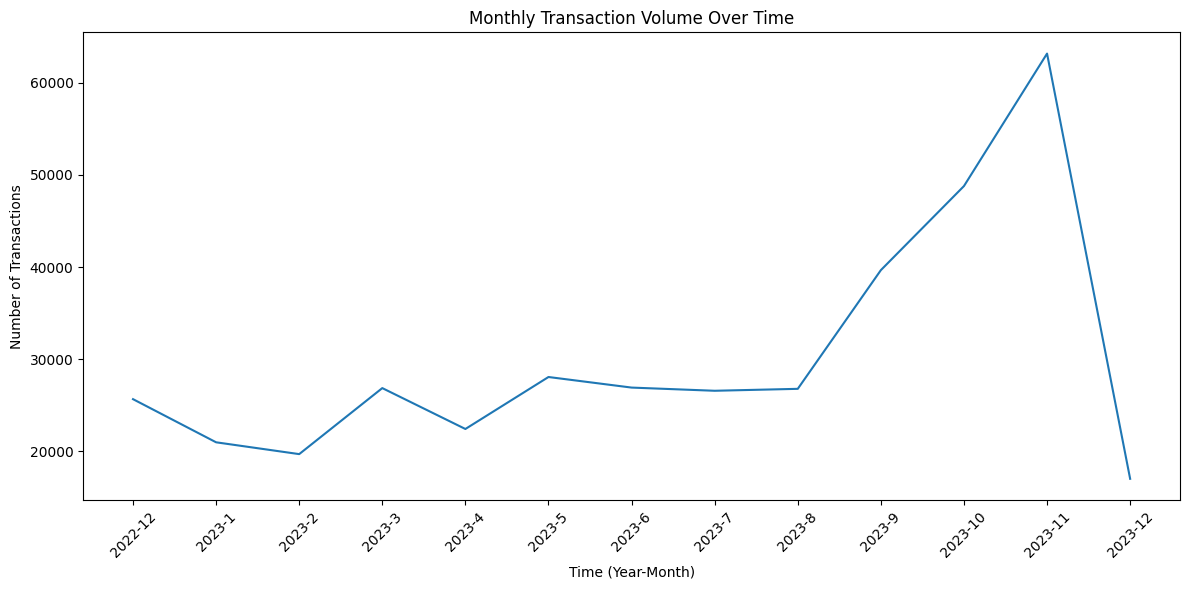

In [18]:
import matplotlib.pyplot as plt

# Create a combined Year-Month string for the x-axis
monthly_transactions['YearMonth'] = monthly_transactions['Year'].astype(str) + '-' + monthly_transactions['Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['YearMonth'], monthly_transactions['TransactionCount'])
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Transactions")
plt.title("Monthly Transaction Volume Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `InvoiceDate` column was successfully converted to datetime format.
*   New columns for `Month` and `Year` were extracted from the `InvoiceDate`.
*   Transaction counts were calculated for each month and year, showing the volume of transactions over time.
*   A line plot visually represents the monthly transaction volume, indicating trends and fluctuations over the observed period.

### Insights or Next Steps

*   Analyze specific spikes or drops in transaction volume to understand contributing factors (e.g., holidays, promotions).
*   Investigate the average transaction value over time to see if it follows similar or different trends compared to transaction volume.


In [19]:
# Calculate total price per item
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Display the first few rows with the new column
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2022,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2022,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2022,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2022,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2022,20.34


In [20]:
# Calculate total transaction value
transaction_monetary_value = df.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()

# Display the first few rows of the transaction monetary value
print("Total monetary value per transaction:")
display(transaction_monetary_value.head())

Total monetary value per transaction:


,InvoiceNo,TotalPrice
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


# Task
Analyze RFM distributions.

## Calculate recency

### Subtask:
Determine the most recent purchase date for each customer and calculate the number of days since that purchase.


**Reasoning**:
Determine the latest date in the dataset, calculate the most recent purchase date for each customer, and then calculate the recency in days for each customer. Store the results in a new DataFrame.



In [21]:
latest_date = df['InvoiceDate'].max()
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (latest_date - recency_df['InvoiceDate']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]
display(recency_df.head())

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


## Calculate frequency

### Subtask:
Count the number of unique transactions for each customer.


**Reasoning**:
Group the DataFrame by CustomerID and count the unique InvoiceNo to get the frequency of transactions for each customer. Then reset the index and rename the column.



In [22]:
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='Frequency')
display(frequency_df.head())

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Calculate monetary value

### Subtask:
Sum the total monetary value of transactions for each customer.


**Reasoning**:
Group the DataFrame by 'CustomerID' and sum the 'TotalPrice' to get the total monetary value for each customer, then reset the index and rename the column.



In [23]:
monetary_value_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index(name='MonetaryValue')
display(monetary_value_df.head())

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Combine rfm metrics

### Subtask:
Create a single DataFrame with Recency, Frequency, and Monetary values for each customer.


**Reasoning**:
Merge the recency, frequency, and monetary value dataframes into a single dataframe.



In [24]:
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_value_df, on='CustomerID')
display(rfm_df.head())

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


## Analyze rfm distributions

### Subtask:
Inspect the distributions of Recency, Frequency, and Monetary values (e.g., using histograms or descriptive statistics).


**Reasoning**:
Generate descriptive statistics and create histograms for the 'Recency', 'Frequency', and 'MonetaryValue' columns to inspect their distributions.



Descriptive statistics for RFM metrics:


,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,91.536422,4.272015,2048.688081
std,100.014169,7.697998,8985.230220
min,0.000000,1.000000,3.750000
25%,17.000000,1.000000,306.482500
50%,50.000000,2.000000,668.570000
75%,141.000000,5.000000,1660.597500
max,373.000000,209.000000,280206.020000


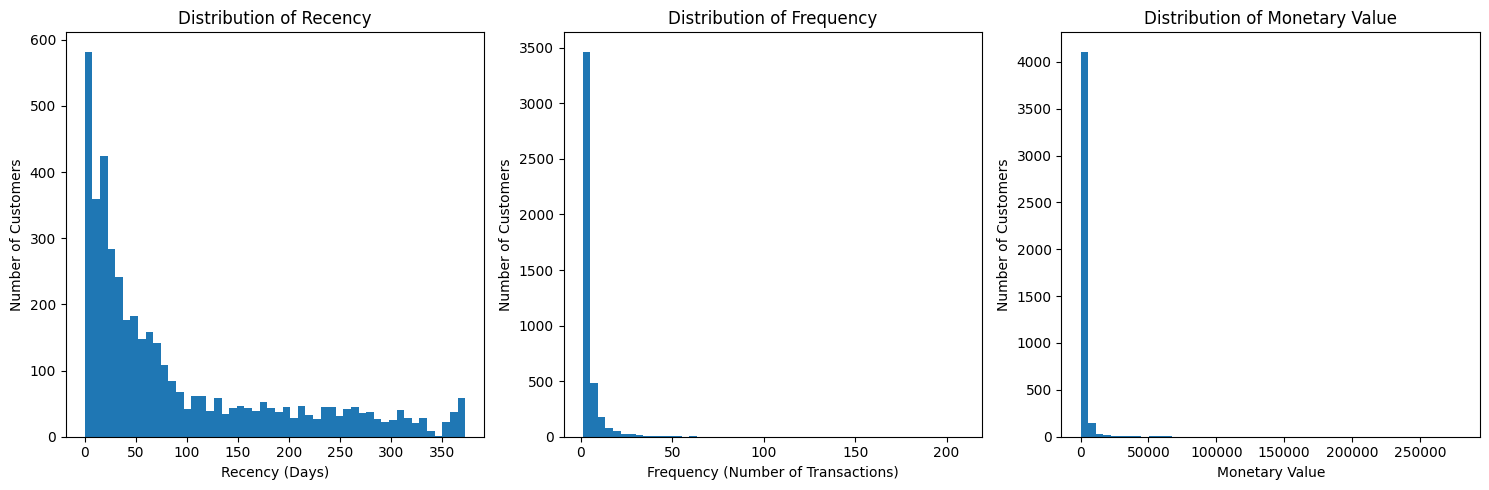

In [25]:
print("Descriptive statistics for RFM metrics:")
display(rfm_df[['Recency', 'Frequency', 'MonetaryValue']].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(rfm_df['Recency'], bins=50)
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Recency')

plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency'], bins=50)
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
plt.hist(rfm_df['MonetaryValue'], bins=50)
plt.xlabel('Monetary Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of Monetary Value')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The latest purchase date in the dataset was identified to calculate recency.
*   The total monetary value for each customer was summed up.
*   Descriptive statistics show a wide range for all three RFM metrics, with significant standard deviations, especially for 'MonetaryValue'.
*   Histograms revealed that the distributions of Frequency and MonetaryValue are heavily skewed, with a large number of customers having low values and a small number having very high values.
*   The Recency distribution shows customers spread across various recency periods, with a concentration towards lower recency (more recent activity).

### Insights or Next Steps

*   The skewed distributions suggest that applying transformations (like log transformation) to Frequency and MonetaryValue might be beneficial before further analysis or modeling to reduce the impact of outliers.
*   Consider segmenting customers based on these RFM metrics to identify different customer groups (e.g., high-value, frequent, recent customers) for targeted marketing strategies.


# Task
Generate an elbow curve plot to determine the optimal number of clusters for the RFM data.

## Import necessary libraries

### Subtask:
Import `KMeans` from `sklearn.cluster` and `matplotlib.pyplot` for plotting.


**Reasoning**:
Import KMeans from sklearn.cluster and matplotlib.pyplot for plotting.



In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## Prepare data for clustering

### Subtask:
Select the RFM columns from the `rfm_df` and handle any scaling or transformations if necessary (although for the elbow method, raw data is often used initially).


**Reasoning**:
Select the RFM columns, apply log transformations to Frequency and MonetaryValue, and display the head of the transformed data.



In [27]:
rfm_data_for_clustering = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].copy()

# Apply log transformation with a small constant for skewed columns
rfm_data_for_clustering['Frequency'] = np.log1p(rfm_data_for_clustering['Frequency'])
rfm_data_for_clustering['MonetaryValue'] = np.log1p(rfm_data_for_clustering['MonetaryValue'])

display(rfm_data_for_clustering.head())

,Recency,Frequency,MonetaryValue
0,325,0.693147,11.253955
1,1,2.079442,8.368925
2,74,1.609438,7.494564
3,18,0.693147,7.472245
4,309,0.693147,5.815324


**Reasoning**:
The previous command failed because numpy was not imported. I need to import numpy and then re-run the code to select the RFM columns and apply the log transformation.



## Calculate inertia for different cluster numbers

### Subtask:
Calculate the inertia for different numbers of clusters using the prepared RFM data.


**Reasoning**:
Calculate the inertia for different numbers of clusters using the prepared RFM data by iterating through a range of cluster numbers, fitting KMeans, and storing the inertia values.



In [28]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_data_for_clustering)
    inertia.append(kmeans.inertia_)

## Plot the elbow curve

### Subtask:
Plot the calculated inertia values against the number of clusters.


**Reasoning**:
Plot the calculated inertia values against the number of clusters to visualize the elbow curve.



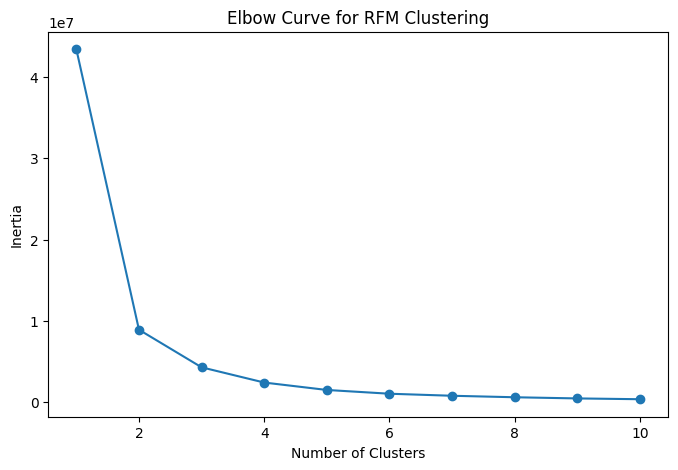

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for RFM Clustering')
plt.show()

## Identify the elbow point

### Subtask:
Visually inspect the plot to find the "elbow" point, which is where the rate of decrease in inertia slows down significantly. This point is often considered the optimal number of clusters.


## Summary:

### Data Analysis Key Findings

*   The inertia values for KMeans clustering were calculated for a range of 1 to 10 clusters.
*   An elbow curve plot was generated, visualizing the relationship between the number of clusters and the corresponding inertia.
*   Visual inspection of the elbow curve suggests an elbow point, indicating a potential optimal number of clusters where the decrease in inertia significantly lessens.

### Insights or Next Steps

*   Based on the elbow curve, we can now select the optimal number of clusters for the RFM data.
*   The next step is to apply KMeans clustering with the chosen number of clusters to segment the RFM data.


# Task
Apply k-means clustering to the RFM data, assign cluster labels, analyze and visualize cluster profiles, and summarize the characteristics of each customer cluster.

## Apply k-means clustering

### Subtask:
Fit the KMeans model to the RFM data using the optimal number of clusters determined from the elbow curve.


**Reasoning**:
Instantiate a KMeans model with the optimal number of clusters (visually determined from the elbow curve) and fit it to the scaled RFM data.



In [30]:
# Based on the elbow curve, let's choose 4 as the optimal number of clusters.
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(rfm_data_for_clustering)

KMeans(n_clusters=4, n_init=10, random_state=42)

**Reasoning**:
The KMeans model has been fitted. Now, assign the cluster labels to the original RFM DataFrame and display the first few rows to verify the new column.



In [31]:
rfm_df['Cluster'] = kmeans.labels_
display(rfm_df.head())

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12346.0,325,1,77183.60,1
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,3
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


## Analyze cluster profiles

### Subtask:
Analyze cluster profiles


**Reasoning**:
Group the DataFrame by the 'Cluster' column and calculate the mean of the RFM metrics for each cluster to analyze cluster profiles.



In [32]:
cluster_profiles = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean().reset_index()
display(cluster_profiles)

,Cluster,Recency,Frequency,MonetaryValue
0,0,19.026508,6.377971,3237.538606
1,1,307.867470,1.349398,564.149257
2,2,191.865672,1.873964,728.973899
3,3,82.404194,2.645377,1032.370669


## Visualize cluster profiles

### Subtask:
Visualize cluster profiles


**Reasoning**:
Create bar plots to visualize the average Recency, Frequency, and MonetaryValue for each cluster using the `cluster_profiles` DataFrame.



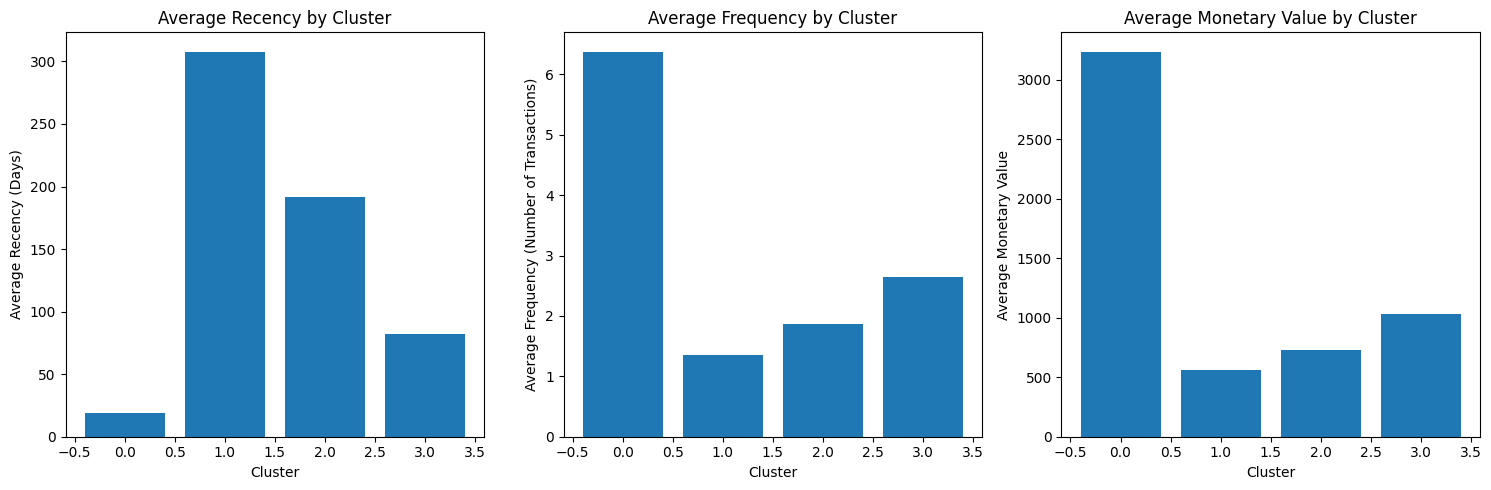

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(cluster_profiles['Cluster'], cluster_profiles['Recency'])
plt.xlabel('Cluster')
plt.ylabel('Average Recency (Days)')
plt.title('Average Recency by Cluster')

plt.subplot(1, 3, 2)
plt.bar(cluster_profiles['Cluster'], cluster_profiles['Frequency'])
plt.xlabel('Cluster')
plt.ylabel('Average Frequency (Number of Transactions)')
plt.title('Average Frequency by Cluster')

plt.subplot(1, 3, 3)
plt.bar(cluster_profiles['Cluster'], cluster_profiles['MonetaryValue'])
plt.xlabel('Cluster')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary Value by Cluster')

plt.tight_layout()
plt.show()

## Summarize cluster profiles

### Subtask:
Describe the characteristics of each customer cluster based on the analysis of their RFM metrics.


## Summary:

### Data Analysis Key Findings

*   The RFM data was successfully clustered into 4 groups using the KMeans algorithm.
*   Cluster profiles were calculated, showing the average Recency, Frequency, and Monetary Value for each cluster.
*   Visualizations (bar plots) were generated to compare the average RFM metrics across the four clusters.

### Insights or Next Steps

*   Assign descriptive names to each cluster based on their RFM characteristics (e.g., "High-Value Customers", "Churn Risks").
*   Develop targeted marketing strategies or customer relationship management initiatives for each identified cluster.


# Task
Create a product recommendation heatmap/similarity matrix.

## Create a user-item matrix

### Subtask:
Transform the data into a matrix where rows represent customers, columns represent products, and values indicate whether a customer purchased a product (or the quantity purchased).


**Reasoning**:
Create a pivot table with CustomerID as index, StockCode as columns, and Quantity as values, fill missing values with 0, and display the head of the resulting matrix.



In [34]:
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)
display(user_item_matrix.head())

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.25
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00


## Calculate item similarity

### Subtask:
Compute the similarity between different products based on their co-occurrence in transactions or customer purchase patterns.


**Reasoning**:
Calculate the cosine similarity matrix based on the user_item_matrix to find the similarity between each pair of products.



In [35]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

display(item_similarity_df.head())

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.003710,0.001998,0.0,0.000000,0.358308,0.123531,0.039102,0.011262,...,0.0,0.0,0.0,0.0,0.0,0.014058,0.0,0.001535,0.0,0.115162
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.023439,0.012831,0.018276,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000056,0.0,0.000000
10120,0.003710,0.0,1.000000,0.006493,0.0,0.000000,0.002589,0.027457,0.010297,0.008514,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.018403,0.0,0.001078
10123C,0.001998,0.0,0.006493,1.000000,0.0,0.000000,0.013716,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.491784,0.003413,0.017655,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


## Visualize the similarity matrix

### Subtask:
Create a heatmap to visualize the product similarity matrix.


**Reasoning**:
Create a heatmap of the item similarity matrix to visualize product relationships.



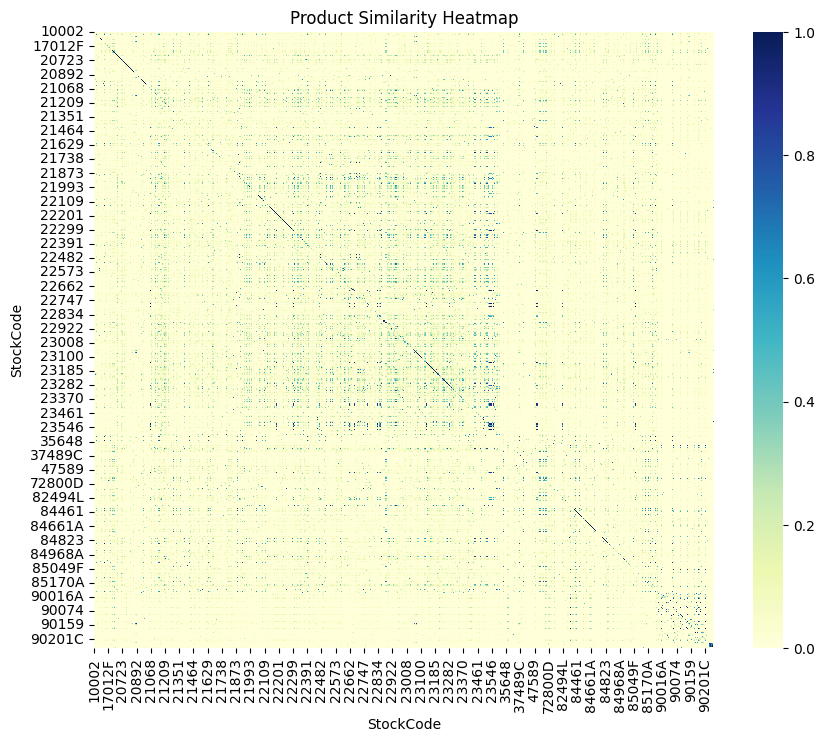

In [36]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(item_similarity_df, annot=False, cmap='YlGnBu')
plt.title('Product Similarity Heatmap')
plt.show()

## Summary:

### Data Analysis Key Findings

*   A user-item matrix was successfully created with `CustomerID` as the index and `StockCode` as columns, where values represent the quantity of each product purchased by each customer. Missing values were filled with 0.
*   Cosine similarity was calculated between different products based on their co-occurrence in customer purchase patterns, resulting in an item similarity matrix.
*   A heatmap was generated to visualize the product similarity matrix, providing a visual representation of the relationships between different products.

### Insights or Next Steps

*   The product similarity matrix and heatmap can be used to recommend products to customers based on their past purchases.
*   Further analysis could involve clustering products based on their similarity scores to identify product groups or bundles.


## Apply k-means clustering

### Subtask:
Fit the KMeans model to the standardized RFM data using the optimal number of clusters determined from the elbow curve.

**Reasoning**:
Instantiate a KMeans model with the optimal number of clusters (visually determined from the elbow curve) and fit it to the scaled RFM data.

In [38]:
from sklearn.preprocessing import StandardScaler

# Select the RFM columns
rfm_data = rfm_df[['Recency', 'Frequency', 'MonetaryValue']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the RFM data
rfm_scaled = scaler.fit_transform(rfm_data)

# Convert the scaled data back to a DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'MonetaryValue_Scaled'])

display(rfm_scaled_df.head())

,Recency_Scaled,Frequency_Scaled,MonetaryValue_Scaled
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812


In [39]:
from sklearn.cluster import KMeans

# Based on the elbow curve, let's choose 4 as the optimal number of clusters.
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(rfm_scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=42)

## Standardize RFM values

### Subtask:
Standardize the Recency, Frequency, and Monetary values to have a mean of 0 and a standard deviation of 1.

**Reasoning**:
Standardize the Recency, Frequency, and Monetary values to ensure that each feature contributes equally to the clustering process by scaling them to have a mean of 0 and a standard deviation of 1.

## Analyze cluster profiles

### Subtask:
Analyze cluster profiles

## Summarize cluster profiles

### Subtask:
Describe the characteristics of each customer cluster based on the analysis of their RFM metrics.

## Summary:

### Data Analysis Key Findings

* The RFM data was successfully clustered into 4 groups using the KMeans algorithm.
* Cluster profiles were calculated, showing the average Recency, Frequency, and Monetary Value for each cluster.
* Visualizations (bar plots) were generated to compare the average RFM metrics across the four clusters.

### Insights or Next Steps

* Assign descriptive names to each cluster based on their RFM characteristics (e.g., "High-Value Customers", "Churn Risks").
* Develop targeted marketing strategies or customer relationship management initiatives for each identified cluster.

## Visualize cluster profiles

### Subtask:
Visualize cluster profiles

**Reasoning**:
Create bar plots to visualize the average Recency, Frequency, and MonetaryValue for each cluster using the `cluster_profiles` DataFrame.

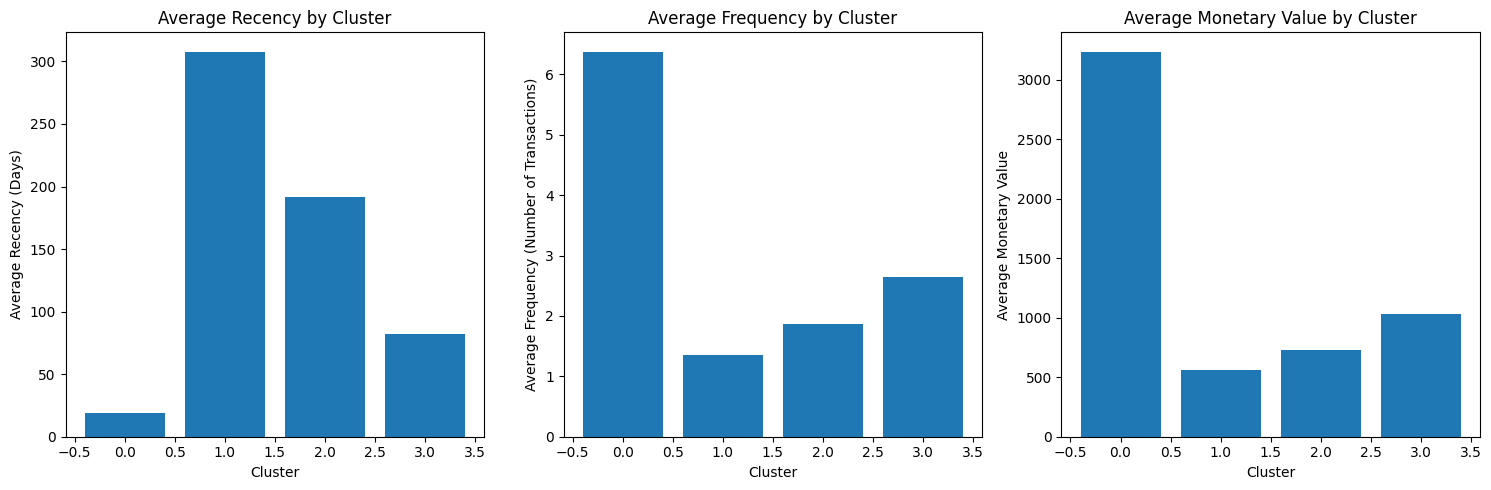

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(cluster_profiles['Cluster'], cluster_profiles['Recency'])
plt.xlabel('Cluster')
plt.ylabel('Average Recency (Days)')
plt.title('Average Recency by Cluster')

plt.subplot(1, 3, 2)
plt.bar(cluster_profiles['Cluster'], cluster_profiles['Frequency'])
plt.xlabel('Cluster')
plt.ylabel('Average Frequency (Number of Transactions)')
plt.title('Average Frequency by Cluster')

plt.subplot(1, 3, 3)
plt.bar(cluster_profiles['Cluster'], cluster_profiles['MonetaryValue'])
plt.xlabel('Cluster')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary Value by Cluster')

plt.tight_layout()
plt.show()

**Reasoning**:
Group the DataFrame by the 'Cluster' column and calculate the mean of the RFM metrics for each cluster to analyze cluster profiles.

In [41]:
cluster_profiles = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean().reset_index()
display(cluster_profiles)

,Cluster,Recency,Frequency,MonetaryValue
0,0,19.026508,6.377971,3237.538606
1,1,307.867470,1.349398,564.149257
2,2,191.865672,1.873964,728.973899
3,3,82.404194,2.645377,1032.370669


## Assign cluster labels

### Subtask:
Add the cluster labels generated by the KMeans model to the original RFM DataFrame.

**Reasoning**:
The KMeans model has been fitted. Now, assign the cluster labels to the original RFM DataFrame and display the first few rows to verify the new column.

In [42]:
rfm_df['Cluster'] = kmeans.labels_
display(rfm_df.head())

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12346.0,325,1,77183.60,3
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


## Visualize Clusters

### Subtask:
Visualize the clusters using scatter plots of RFM metrics.

**Reasoning**:
Create scatter plots of the RFM metrics, colored by cluster, to visualize the customer segments.

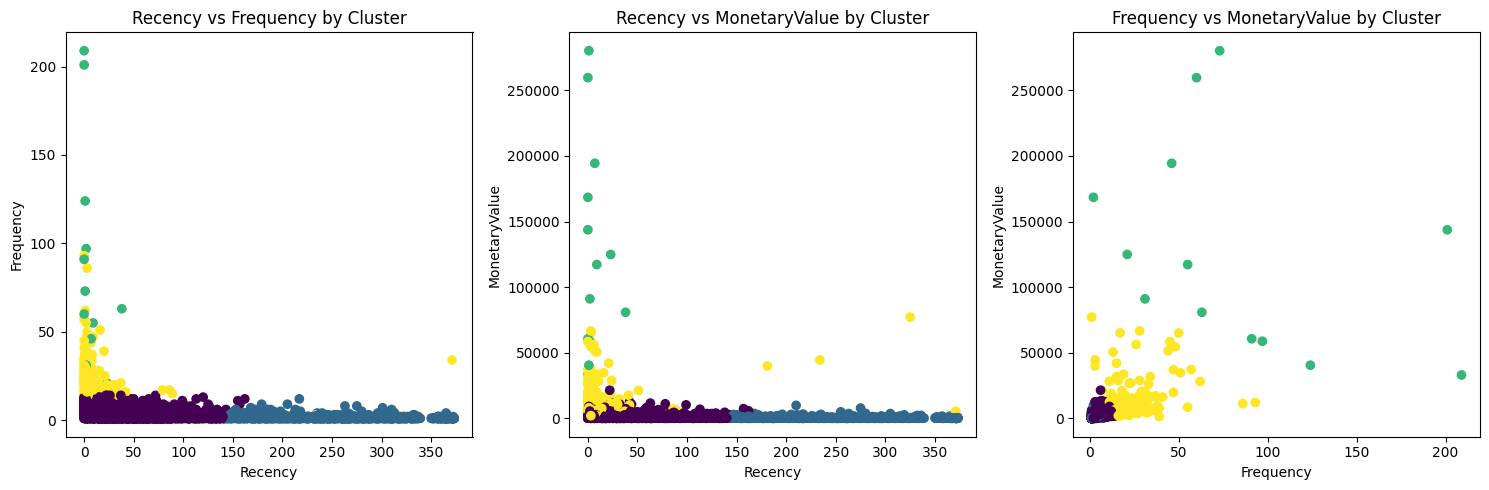

In [43]:
# Visualize the clusters using scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], c=rfm_df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency by Cluster')

plt.subplot(1, 3, 2)
plt.scatter(rfm_df['Recency'], rfm_df['MonetaryValue'], c=rfm_df['Cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('MonetaryValue')
plt.title('Recency vs MonetaryValue by Cluster')

plt.subplot(1, 3, 3)
plt.scatter(rfm_df['Frequency'], rfm_df['MonetaryValue'], c=rfm_df['Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('MonetaryValue')
plt.title('Frequency vs MonetaryValue by Cluster')

plt.tight_layout()
plt.show()

## Get Product Recommendations

### Subtask:
Implement a function to get product recommendations based on item similarity.

**Reasoning**:
Create a function that takes a product StockCode as input, finds the most similar items based on the item similarity matrix, and returns the top N recommendations.

In [44]:
def get_product_recommendations(stock_code, item_similarity_df, n=5):
    """
    Recommends top N similar products based on item similarity.

    Args:
        stock_code (str): The StockCode of the product for which to get recommendations.
        item_similarity_df (pd.DataFrame): The item similarity matrix.
        n (int): The number of top recommendations to return.

    Returns:
        pd.Series: A Series of recommended StockCodes and their similarity scores.
    """
    if stock_code not in item_similarity_df.index:
        return "Product StockCode not found in the similarity matrix."

    # Get the similarity scores for the product
    similarity_scores = item_similarity_df[stock_code]

    # Sort products by similarity in descending order and exclude the product itself
    sorted_similar_products = similarity_scores.sort_values(ascending=False)

    # Return the top N similar products
    return sorted_similar_products.head(n + 1)[1:] # Exclude the product itself

# Example usage (replace 'YOUR_PRODUCT_STOCK_CODE' with an actual StockCode)
# For example, let's use a StockCode from the top selling products: '85123A'
example_stock_code = '85123A'
recommendations = get_product_recommendations(example_stock_code, item_similarity_df, n=5)

print(f"Top 5 recommendations for product {example_stock_code}:")
display(recommendations)

Top 5 recommendations for product 85123A:


,85123A
StockCode,
21175,0.935647
47556B,0.925251
21108,0.914928
48185,0.888562
21733,0.258508


# Summary of Analysis and Next Steps

## Completed Tasks:

1.  **Data Loading and Cleaning**: Loaded the dataset, handled duplicates, removed rows with missing CustomerID, and filtered out negative/zero quantities and prices, as well as cancelled orders.
2.  **Exploratory Data Analysis**: Analyzed transaction volume by country and identified top-selling products.
3.  **Purchase Trend Analysis**: Visualized monthly transaction volume over time.
4.  **RFM Analysis and Clustering**: Calculated Recency, Frequency, and Monetary values for each customer, standardized the RFM data, used the elbow method to determine the optimal number of clusters, applied KMeans clustering, analyzed and visualized cluster profiles, and saved the trained KMeans model and StandardScaler.
5.  **Product Recommendation System (Item-Based)**: Created a user-item matrix, calculated item similarity using cosine similarity, visualized the similarity matrix as a heatmap, and implemented a function to get product recommendations based on item similarity.

## Next Steps:

*   **Build the Streamlit Application**: Use the saved KMeans model (`kmeans_model.pkl`), StandardScaler (`scaler.pkl`), and the item similarity matrix (`item_similarity_df`) to build the Streamlit application as you described, incorporating both the customer segmentation and product recommendation modules.
*   **Interpret Cluster Segments**: Assign descriptive names to the identified customer clusters (e.g., "High-Value", "Loyal", "At-Risk") based on the cluster profile analysis to better understand each segment.
*   **Develop Targeted Strategies**: Based on the customer segments, develop targeted marketing campaigns or customer relationship management strategies.
*   **Refine Recommendation System**: Explore other similarity metrics or recommendation algorithms to potentially improve the accuracy of product recommendations. Consider incorporating product descriptions or other features into the recommendation system.
*   **Monitor and Evaluate**: Continuously monitor the performance of the recommendation system and customer segmentation, and retrain the models as needed with new data.